## Parte 2: Small world graph
In questa sezione andiamo ad analizzare un Watts-Strogatz small-world graph generato tramite networkx.

Il numero di nodi è uguale al grafo precedente, la sua p è uguale a 0.07, un valore che permette di dare risalto ai cossiddetti cluster di nodi.

In [1]:
import networkx
graph = networkx.watts_strogatz_graph(150,4,0.07, seed=42)


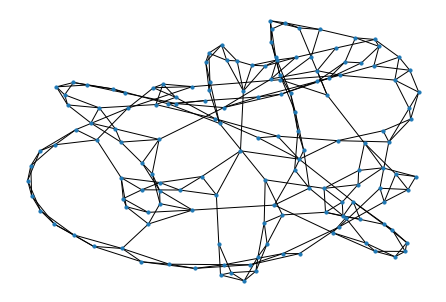

In [2]:
import matplotlib.pyplot as plt

networkx.draw(graph, with_labels=False, node_size=10)
plt.show()

In [3]:
print("Number of nodes: ", len(graph))
print("Number of edges: ", graph.number_of_edges())

Number of nodes:  150
Number of edges:  300


In [4]:
import collections

def average_degree(graph):
    """
    Calculate the average degree of the network
    :param graph: the networkx Graph() object
    :return: the average degree of the network
    """
    k = map(lambda d: d[1], graph.degree())
    return sum(list(k)) / graph.number_of_nodes()

print("Avarage degree: ", average_degree(graph))

Avarage degree:  4.0


Text(0.5, 0, 'Degree')

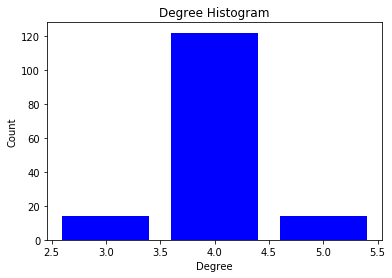

In [5]:
# Plot istrogramma degree

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")



In [6]:
print("Density: ", networkx.density(graph))


Density:  0.026845637583892617


In [7]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)

components = sorted(connected_component_subgraphs(graph), key=len, reverse=True)
print("There are ", len(components), " connected components")
print("Giant component size: ", len(components[0]))



There are  1  connected components
Giant component size:  150


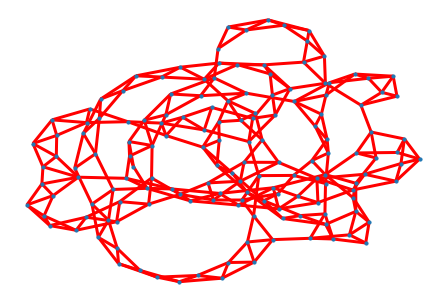

In [8]:
# Plot del grafo con le varie componenti connesse colorate con diversi colori
# identify largest connected component
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



pos = graphviz_layout(graph)

networkx.draw(graph, pos, with_labels=False, node_size=10)
# Getting largest connected component
graphcc = sorted(networkx.connected_components(graph), key=len, reverse=True)
graph0 = graph.subgraph(graphcc[0])
networkx.draw_networkx_edges(graph0, pos,
                        with_labels=False,
                        edge_color='r',
                        width=3.0
                        )
# show other connected components
for Gi in graphcc[1:]:
    if len(Gi) > 1:
        networkx.draw_networkx_edges(graph.subgraph(Gi), pos,
                                with_labels=False,
                                edge_color='r',
                                alpha=0.3,
                                width=2.0
                                )



Nelle celle seguenti andiamo quindi a misurare la distanza massima (diametro), minima (raggio) e media tra due punti qualsiasi del grafo.  
<br>In realtà non è possibile trovare queste misure per tutto il grafo se non è completamente connesso perché la il diametro e la media sarebbero uguali ad infinito.

In [9]:
print("Maximum eccentricity of giant component: ", networkx.diameter(components[0])) 

Maximum eccentricity of giant component:  13


In [10]:
print("Minimun eccentricity of giant component: ", networkx.radius(components[0])) 

Minimun eccentricity of giant component:  9


In [11]:
print("Average shortes path: ", networkx.average_shortest_path_length(components[0]))

Average shortes path:  6.403758389261745


Adesso andiamo ad analizzare il clustering coefficient e la transitivity che ci da un'idea di quanto i nodi siano connessi tra di loro e la percentuale di cliques all'interno del grafo.

In [12]:
print("Average clustering coefficient: ", networkx.average_clustering(graph))

Average clustering coefficient:  0.40866666666666673


In [13]:
print("Transitivity: ", networkx.transitivity(graph))

Transitivity:  0.40043763676148797


### Considerazioni

Nonostante il numero di archi sia notevolmente aumentato rispetto al random graph i valori che rappresentano la distanza tra i nodi sono rimasti invariati. 

Quelli che sono interessanti da notare sono i valori di clustering e transitivity, notevolmente aumentati, proprio come analizzato in teoria.

Tuttavia nelle slide il coefficiente di clustering per p=0.07 era all'incirca 0.6; in questo caso invece è ancora un po' basso: 0.41 

#### Nodi importanti

In questa sezione si andrà ad analizzare quale nodi sono più importanti di altri, in base a metriche descritte in precedenza.

Questi nodi saranno poi target di attacchi per il 2nd assignment.

In [14]:
print("10 nodi con degree maggiore")
dict(sorted(graph.degree, key=lambda x: x[1], reverse=True)[:10])

10 nodi con degree maggiore


{5: 5, 8: 5, 19: 5, 23: 5, 28: 5, 33: 5, 58: 5, 94: 5, 97: 5, 99: 5}

In [15]:
import operator

print("10 nodi con maggiore closeness")
dict(sorted(networkx.closeness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore closeness


{67: 0.19225806451612903,
 8: 0.19176319176319176,
 63: 0.19127086007702182,
 65: 0.18932655654383734,
 138: 0.1871859296482412,
 23: 0.18671679197994986,
 68: 0.18671679197994986,
 39: 0.18601747815230962,
 103: 0.18259803921568626,
 130: 0.18126520681265207}

In [16]:
print("10 nodi con maggiore betweenness")
dict(sorted(networkx.betweenness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore betweenness


{8: 0.14364251848674506,
 138: 0.13338223911147962,
 39: 0.12408088052445593,
 23: 0.12107743748100876,
 28: 0.11049205384523476,
 67: 0.10991547068488763,
 29: 0.10739037407874734,
 103: 0.10297474610611422,
 84: 0.10127154398796283,
 68: 0.0958417558079358}

In [17]:
print("10 nodi con maggiore clustering coefficient")
dict(sorted(networkx.clustering(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore clustering coefficient


{41: 0.6666666666666666,
 51: 0.6666666666666666,
 110: 0.6666666666666666,
 136: 0.6666666666666666,
 140: 0.6666666666666666,
 4: 0.5,
 6: 0.5,
 14: 0.5,
 15: 0.5,
 16: 0.5}